Author: Rodrigo Santos, fc60552


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, matthews_corrcoef, make_scorer, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [4]:
# load the dataset

# small dataset
# data = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# large dataset
data = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv")

In [5]:
# display the first 5 rows 
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
# summary of the dataset
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# check missing values
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
# check duplicated data
print(data.duplicated())
print("Number of duplicated: ", data.duplicated().sum())

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool
Number of duplicated:  24206


In [11]:
# probably multiple respondants can give exactly the same answers as other respondant
data[data.duplicated()]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


<Axes: xlabel='Diabetes_binary', ylabel='count'>

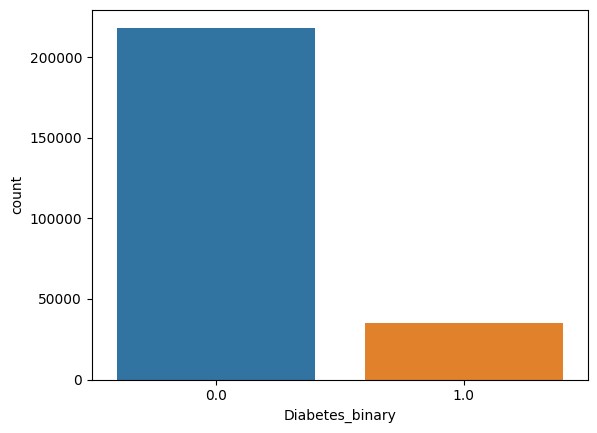

In [12]:
# distribution of the target variable
sns.countplot(x='Diabetes_binary', data=data)

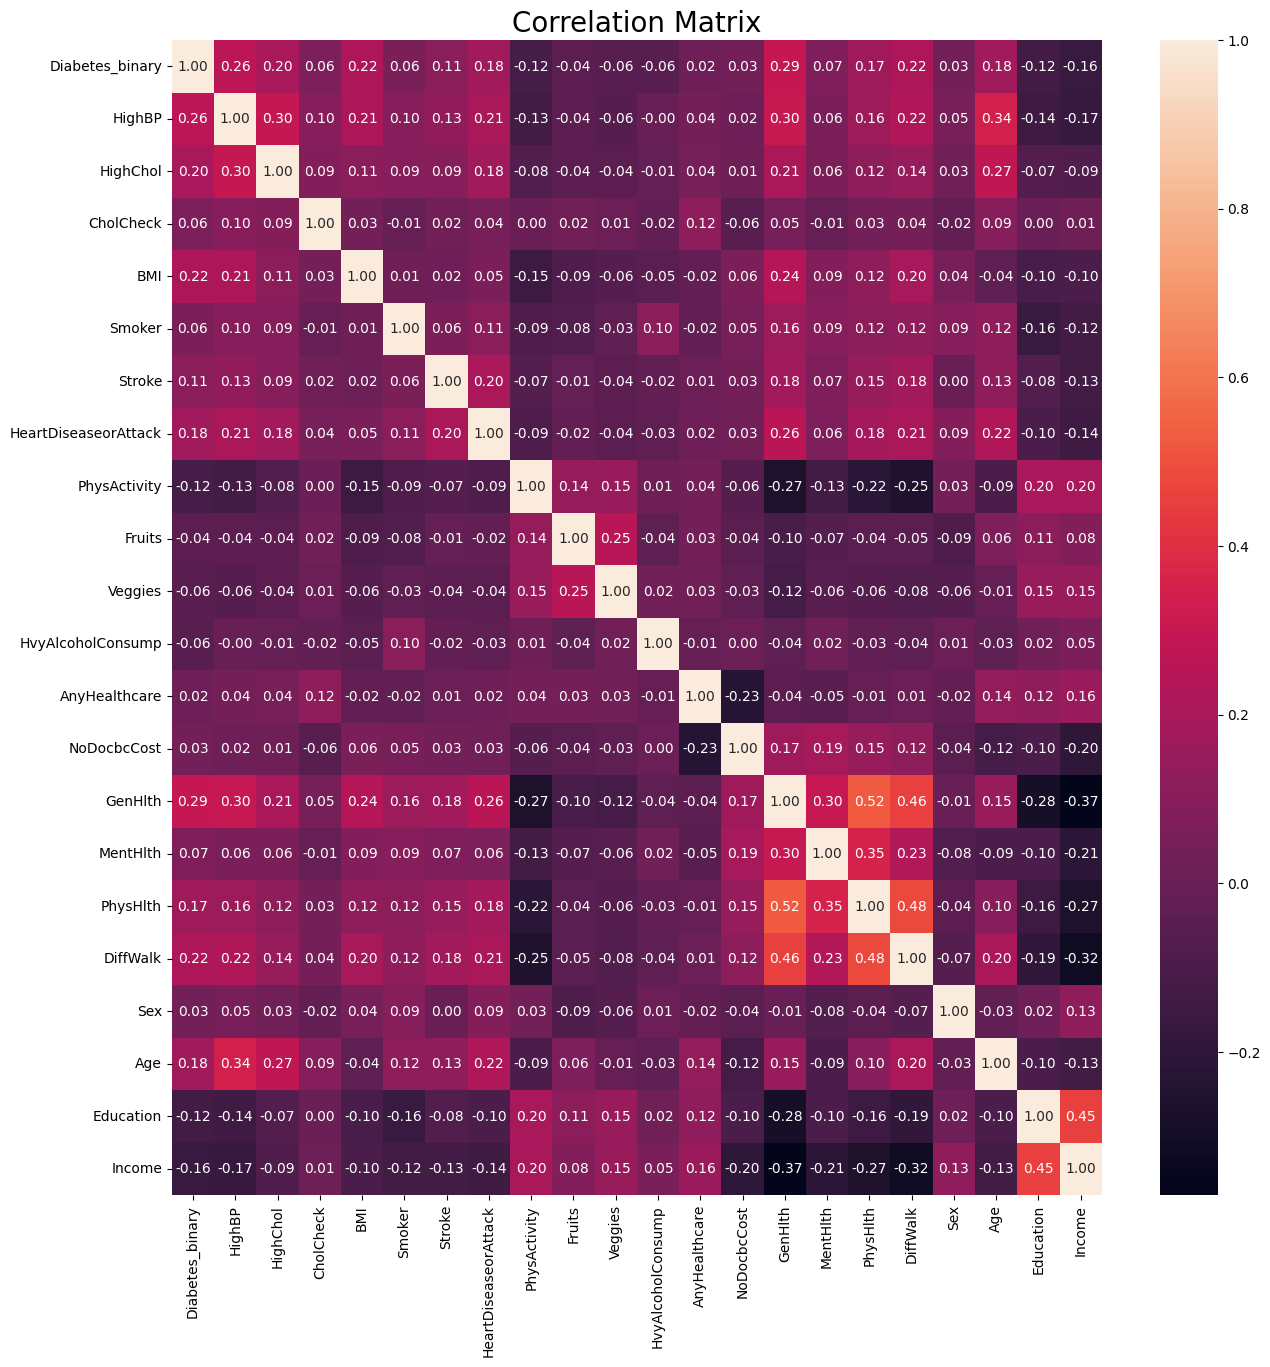

In [13]:
# correlation matrix
f, ax = plt.subplots(figsize= [15, 15])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

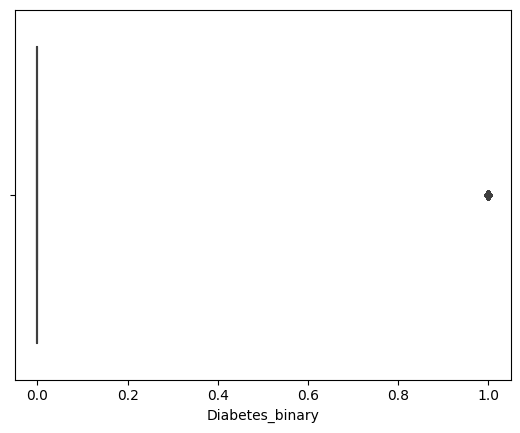

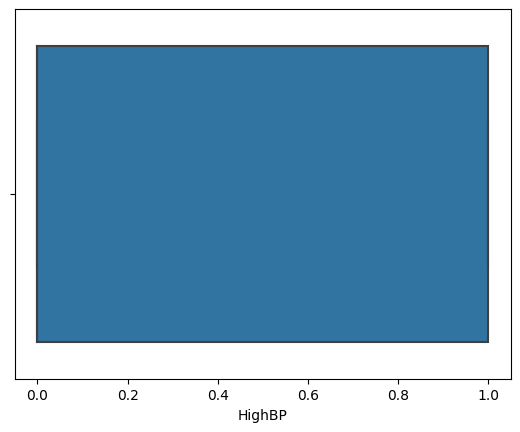

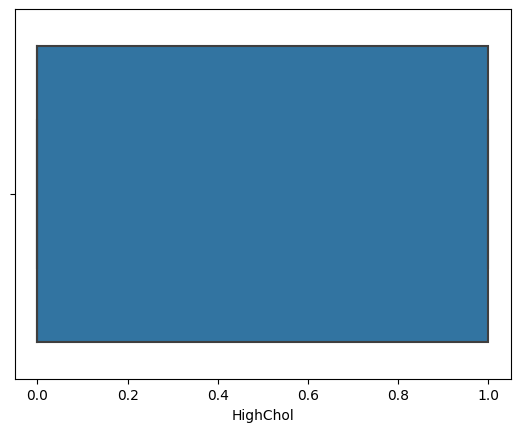

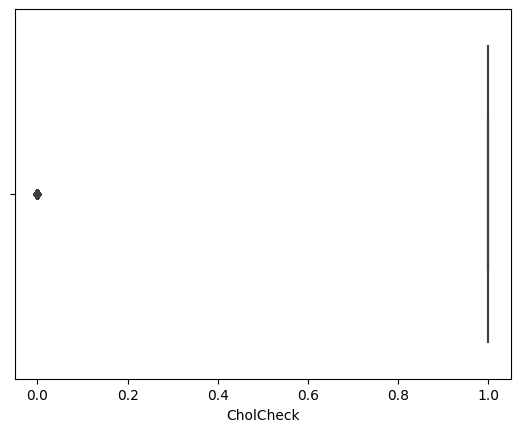

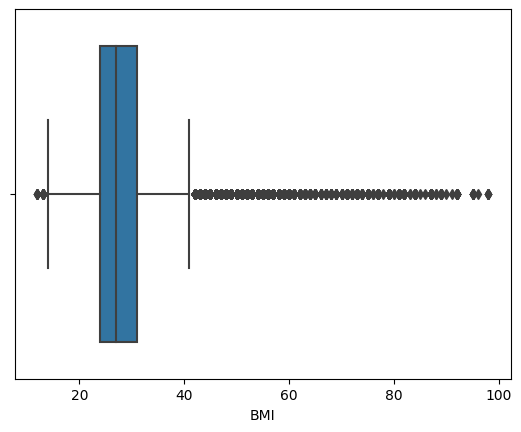

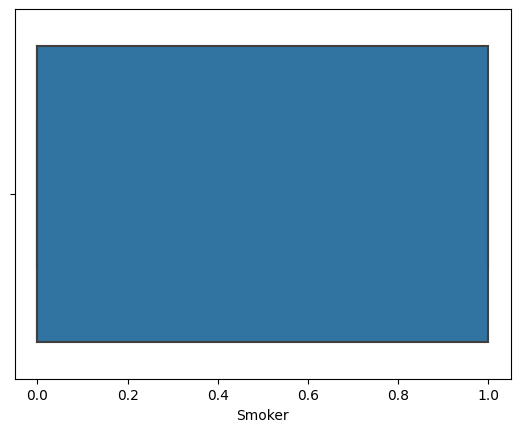

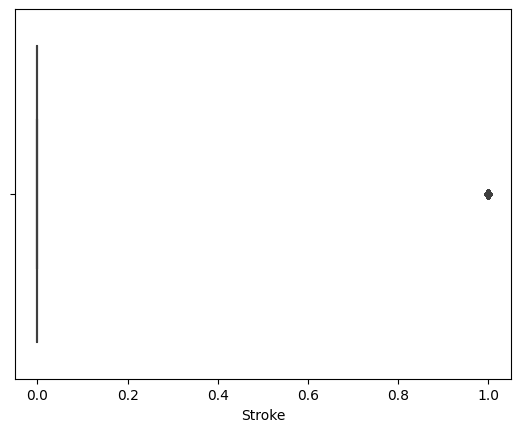

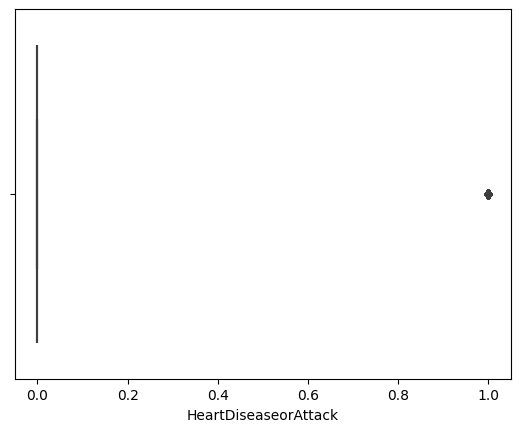

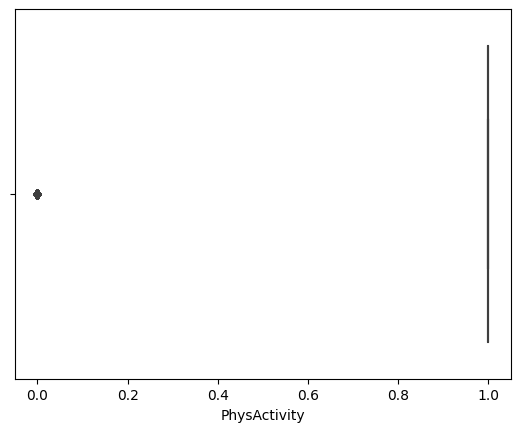

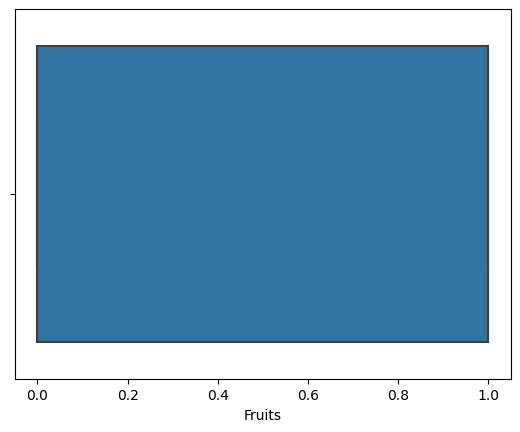

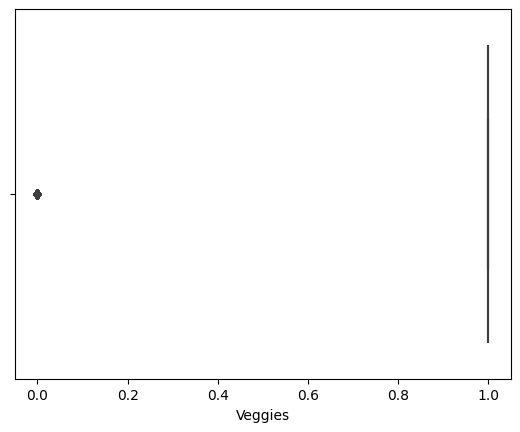

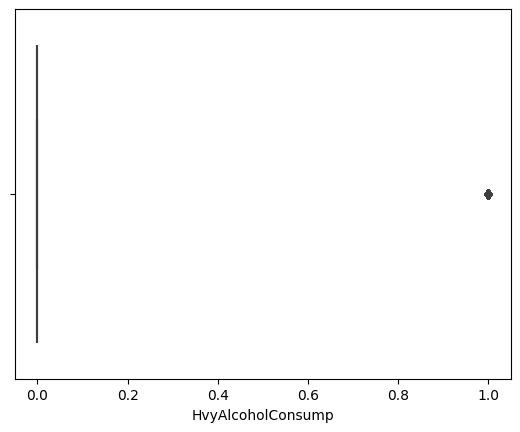

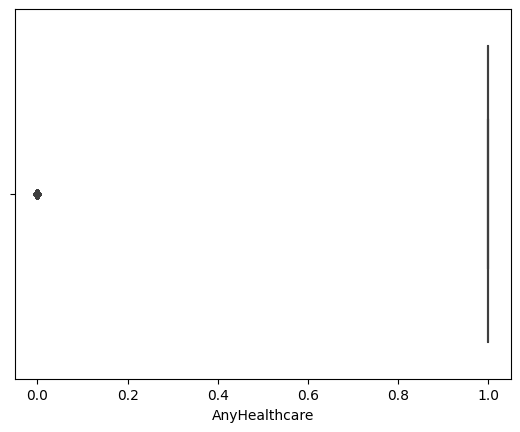

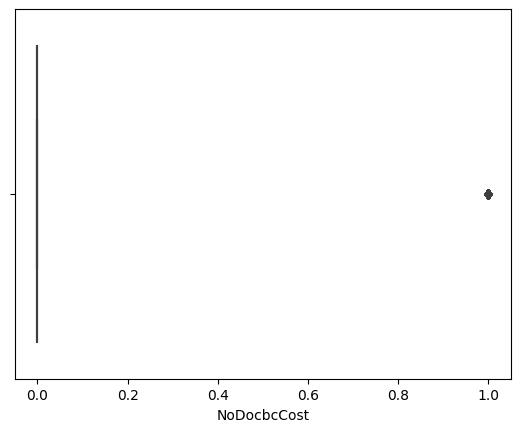

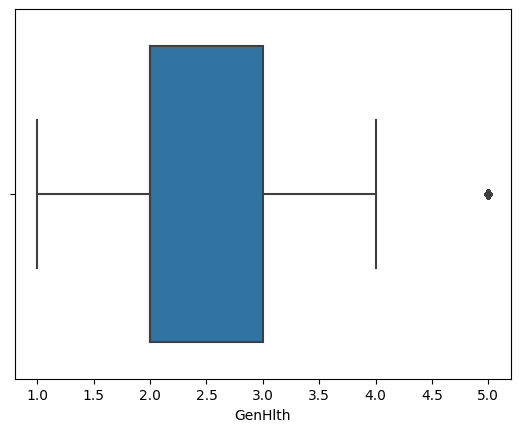

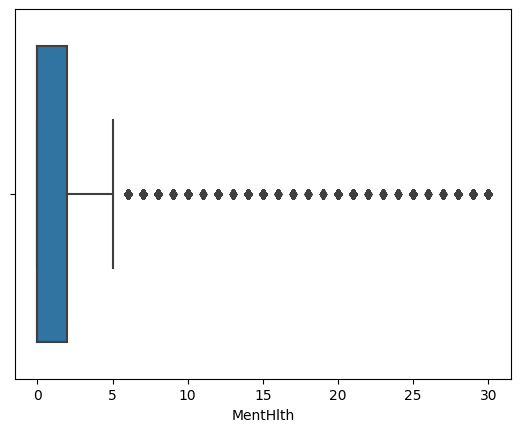

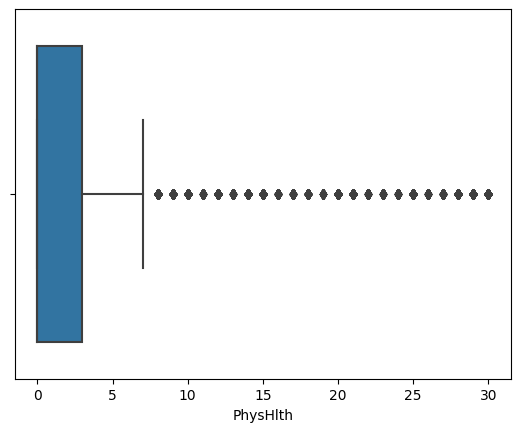

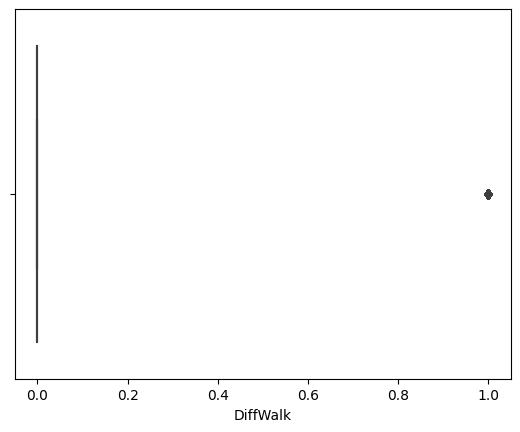

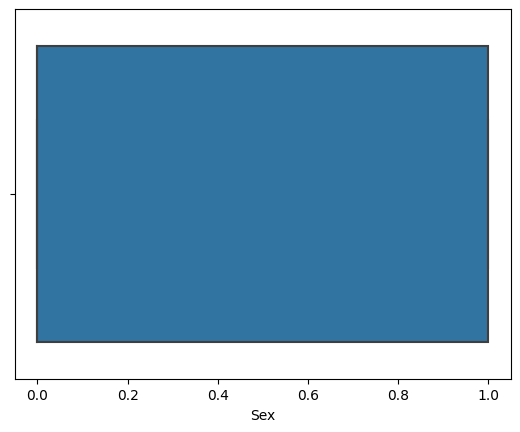

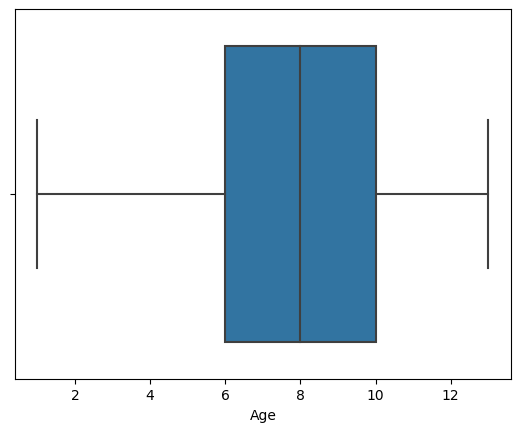

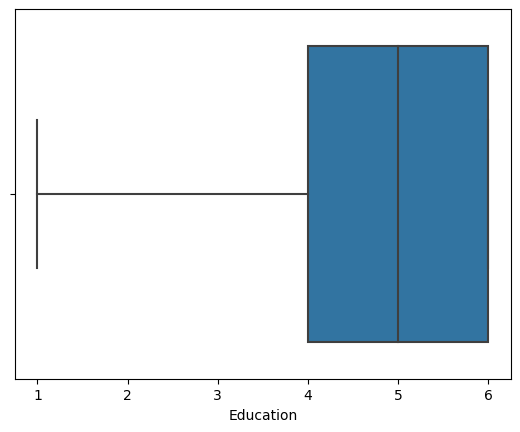

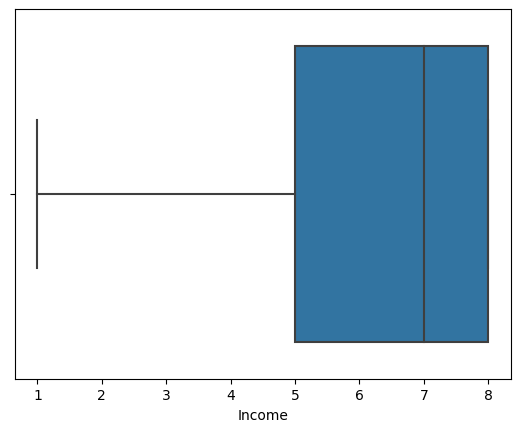

In [14]:
for feature in data.columns:
    sns.boxplot(x=feature, data=data)
    plt.show()

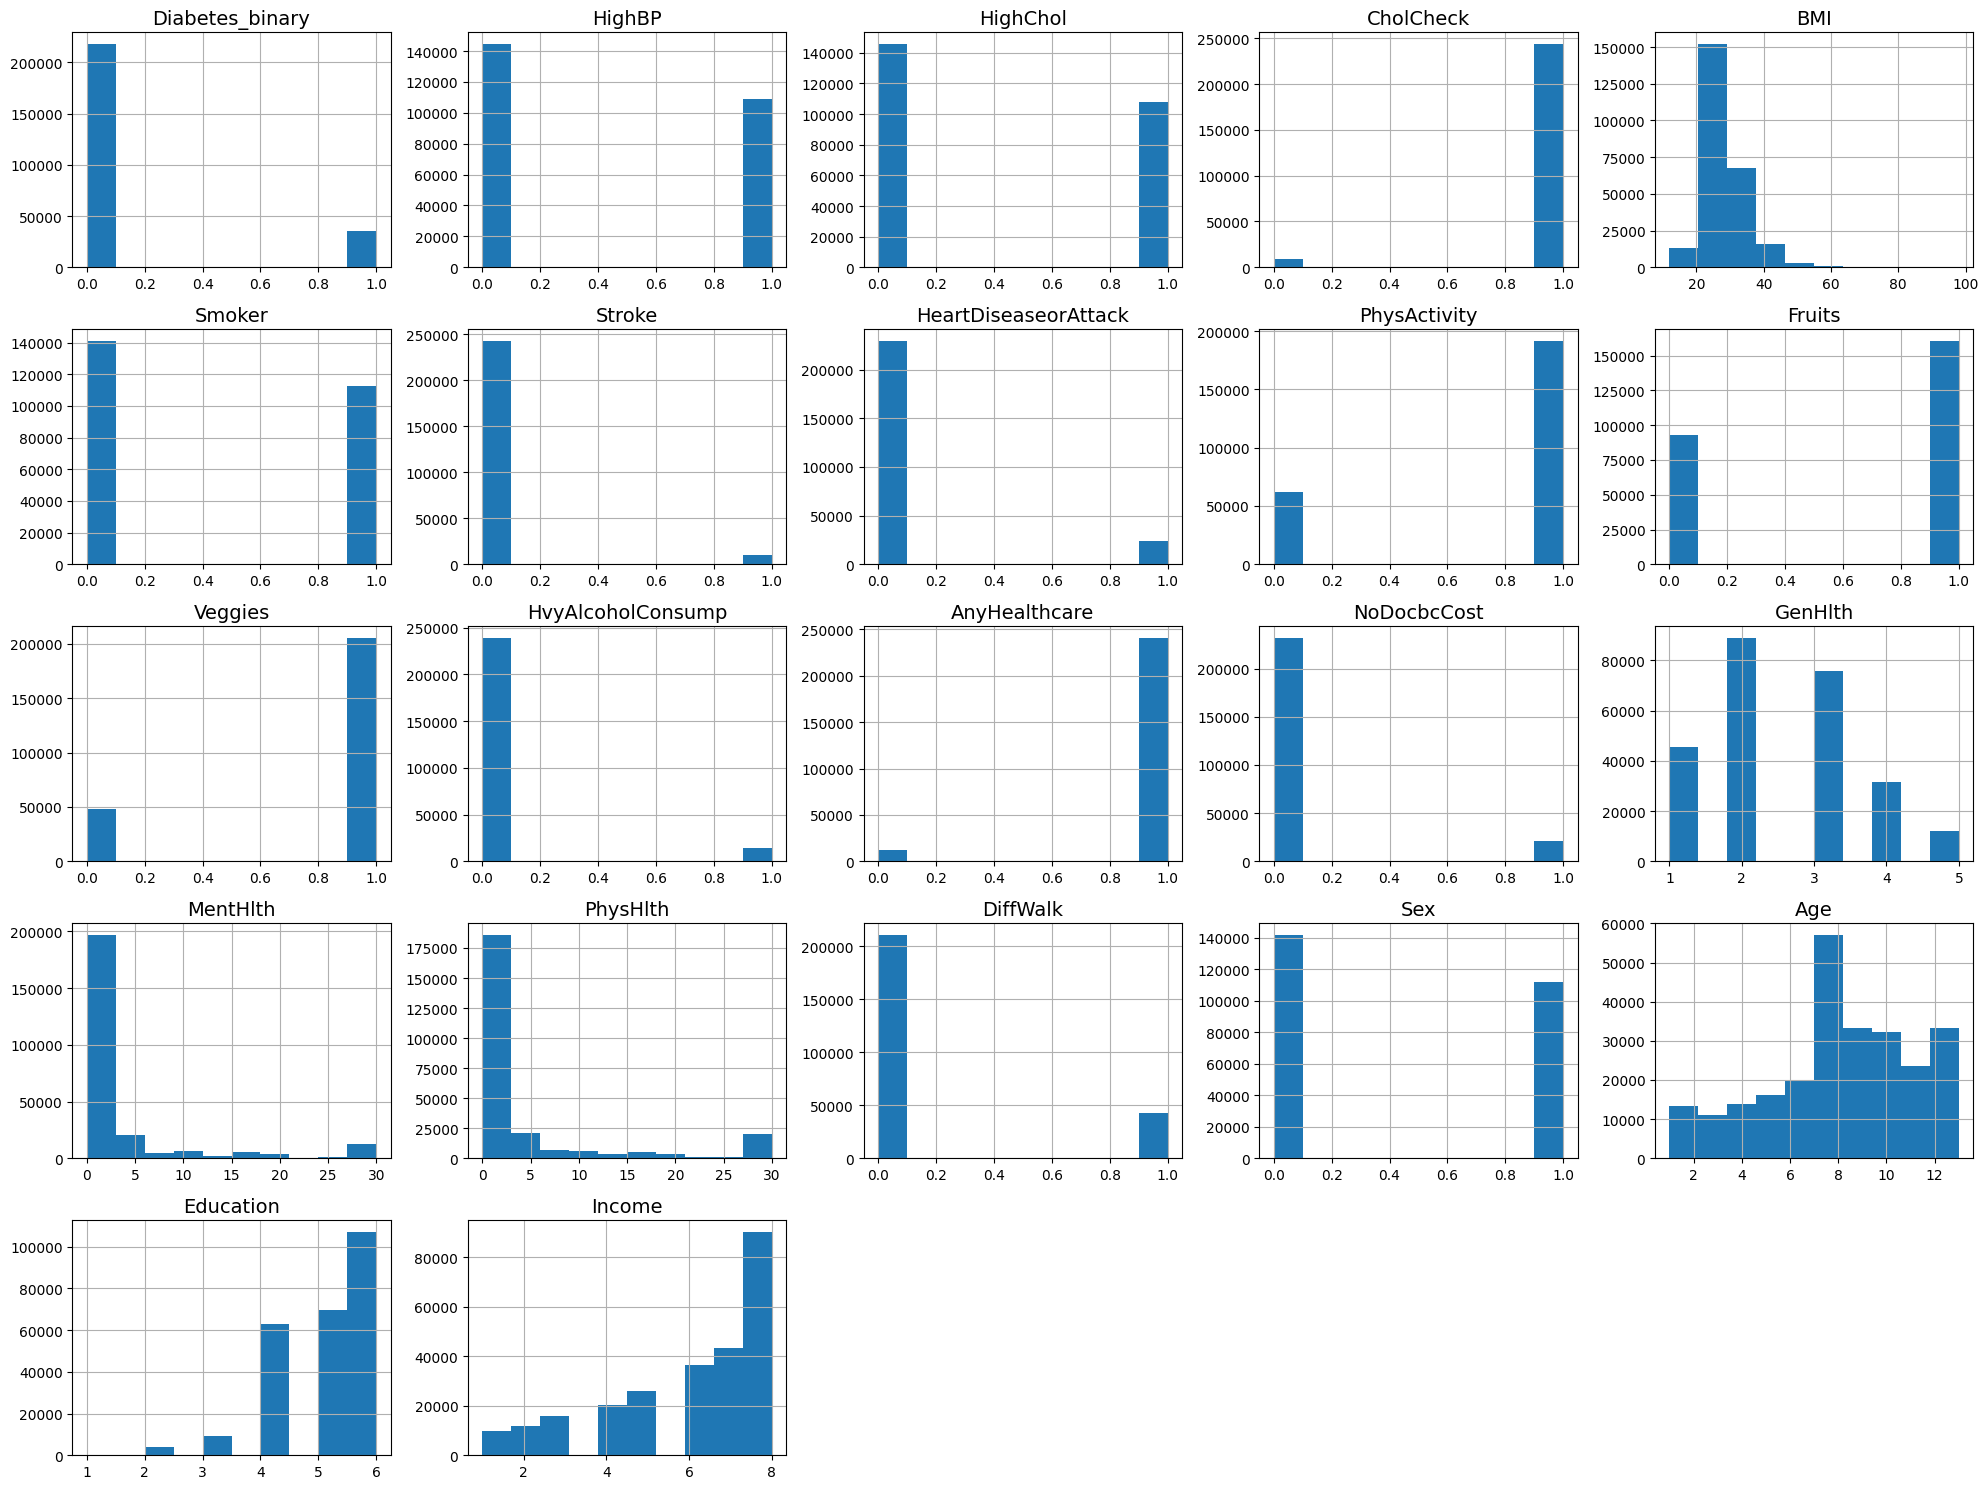

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20,15))

ax = ax.flatten()

for i, col in enumerate(data.columns):
    data[col].hist(ax=ax[i])
    ax[i].set_title(col, fontsize=14)

for i in ax[22:25]:
    i.remove()

plt.tight_layout()

In [16]:
pd.crosstab(data.HighBP, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
HighBP,,
0.0,136109,8742
1.0,82225,26604


In [17]:
for feature in data.columns:
  if feature != 'Diabetes_binary':
    print(pd.crosstab(data[feature], data.Diabetes_binary))
    print("\n-------------------------------\n")

Diabetes_binary     0.0    1.0
HighBP                        
0.0              136109   8742
1.0               82225  26604

-------------------------------

Diabetes_binary     0.0    1.0
HighChol                      
0.0              134429  11660
1.0               83905  23686

-------------------------------

Diabetes_binary     0.0    1.0
CholCheck                     
0.0                9229    241
1.0              209105  35105

-------------------------------

Diabetes_binary  0.0  1.0
BMI                      
12.0               6    0
13.0              19    2
14.0              37    4
15.0             120   12
16.0             328   20
...              ...  ...
91.0               1    0
92.0              27    5
95.0              11    1
96.0               1    0
98.0               4    3

[84 rows x 2 columns]

-------------------------------

Diabetes_binary     0.0    1.0
Smoker                        
0.0              124228  17029
1.0               94106  18317

------

In [18]:
# split the data
X = data.drop("Diabetes_binary", axis=1)
y = data["Diabetes_binary"]

In [19]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [20]:
# defining pipeplines using standard scaler and the models itself
pipelines = {    
    "dtc": Pipeline([("dtc", DecisionTreeClassifier(random_state=22))]),
    "abc": Pipeline([("abc", AdaBoostClassifier(random_state=22))]),
    "xgbc": Pipeline([("xgbc", XGBClassifier(random_state=22))]),
    "mlpc": Pipeline([("scaler", StandardScaler()), ("mlpc", MLPClassifier(random_state=22))]),
    "rfc": Pipeline([("rfc", RandomForestClassifier(random_state=22))]),
    "lr": Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(random_state=22))]),
    "gnb": Pipeline([("gnb", GaussianNB())])
}

In [21]:
# define the hyperparameters to use on GridSearchCV
hyperparameters = {    
    "dtc": {"dtc__criterion": ["gini", "entropy"], "dtc__max_depth": [3, 5, 10, 15]},
    "abc": {"abc__n_estimators": [50, 75, 100, 150], "abc__learning_rate": [0.01, 0.1, 1.0]},
    "xgbc": {"xgbc__max_depth": [3, 5, 10], "xgbc__n_estimators": [50, 100], "xgbc__learning_rate": [0.01, 0.1, 1.0]},
    "mlpc": {"mlpc__hidden_layer_sizes": [(100, ), (10, 10), (16, 8), (8, 8)], "mlpc__activation": ["logistic", "tanh", "relu"], "mlpc__solver": ["sgd", "adam"]},
    "rfc": {"rfc__n_estimators": [100, 200], "rfc__criterion": ["gini", "entropy"], "rfc__max_depth": [None, 5]},
    "lr": {"lr__penalty": [None, "l2"]},
    "gnb": {}
}

In [22]:
# define some metrics to use on GridSearchCV
metrics = {
    "accuracy": make_scorer(accuracy_score),
    "f1": make_scorer(f1_score),
    "matthews": make_scorer(matthews_corrcoef),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score)
}

In [23]:
for model, pipeline in pipelines.items():
  print(model, "----", pipeline)

dtc ---- Pipeline(steps=[('dtc', DecisionTreeClassifier(random_state=22))])
abc ---- Pipeline(steps=[('abc', AdaBoostClassifier(random_state=22))])
xgbc ---- Pipeline(steps=[('xgbc',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_c

In [24]:
# using GridSearchCV on each model
best_models = {}
best_params = {}

for model, pipeline in pipelines.items():
  
  # n_jobs = -1, to use all processors and be more efficient
  gscv = GridSearchCV(pipeline, hyperparameters[model], cv=5, n_jobs=-1, scoring=metrics, refit="accuracy")
  
  gscv.fit(X_train, y_train)
  print(f"{model}:  {gscv.best_score_}")
  print(f"Best parameters: {gscv.best_params_}")
  best_models[model] = gscv.best_estimator_
  best_params[model] = gscv.best_params_

dtc:  0.8651598452172854
Best parameters: {'dtc__criterion': 'gini', 'dtc__max_depth': 5}
abc:  0.8660615697867818
Best parameters: {'abc__learning_rate': 0.1, 'abc__n_estimators': 150}
xgbc:  0.8676432848227655
Best parameters: {'xgbc__learning_rate': 0.1, 'xgbc__max_depth': 5, 'xgbc__n_estimators': 100}
mlpc:  0.8672195260261265
Best parameters: {'mlpc__activation': 'logistic', 'mlpc__hidden_layer_sizes': (10, 10), 'mlpc__solver': 'adam'}
rfc:  0.8616465635077635
Best parameters: {'rfc__criterion': 'gini', 'rfc__max_depth': 5, 'rfc__n_estimators': 100}
lr:  0.8640708699076445
Best parameters: {'lr__penalty': 'l2'}
gnb:  0.7737701090721669
Best parameters: {}


In [25]:
# evaluate each model on test set
test_acc = {}

for name, model in best_models.items():
  
  # train it again
  model.fit(X_train, y_train)

  pred = model.predict(X_test)
  
  acc = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  matthews = matthews_corrcoef(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  test_acc[name] = acc
  cm = confusion_matrix(pred, y_test)

  print(f"{name}: acc -> {acc}")
  print(f"{name}: f1 -> {f1}")
  print(f"{name}: matthews -> {matthews}")
  print(f"{name}: precision -> {precision}")
  print(f"{name}: recall -> {recall}")
  print(f"{name}: confusion matrix -> {cm}")
  tn, fp, fn, tp = cm.ravel()  
  print("True Negatives:", tn)
  print("False Positives:", fp)
  print("False Negatives:", fn)
  print("True Positives:", tp)
  print("-------------------------------------\n")

dtc: acc -> 0.8631543677073479
dtc: f1 -> 0.16218173042114153
dtc: matthews -> 0.19550652542512045
dtc: precision -> 0.5894736842105263
dtc: recall -> 0.0940254652301665
dtc: confusion matrix -> [[43121  6475]
 [  468   672]]
True Negatives: 43121
False Positives: 6475
False Negatives: 468
True Positives: 672
-------------------------------------

abc: acc -> 0.8641398612425103
abc: f1 -> 0.1989540964555491
abc: matthews -> 0.22064078973519088
abc: precision -> 0.5871056241426612
abc: recall -> 0.11977053309080733
abc: confusion matrix -> [[42987  6291]
 [  602   856]]
True Negatives: 42987
False Positives: 6291
False Negatives: 602
True Positives: 856
-------------------------------------

xgbc: acc -> 0.8656969410280668
xgbc: f1 -> 0.24657231313578065
xgbc: matthews -> 0.2531804293394461
xgbc: precision -> 0.5877701634159199
xgbc: recall -> 0.15600951448160066
xgbc: confusion matrix -> [[42807  6032]
 [  782  1115]]
True Negatives: 42807
False Positives: 6032
False Negatives: 782
Tru

In [26]:
# choose the best model based on validation set performance
best_model = max(test_acc, key=test_acc.get)
print(f"Best model based on test set performance: {best_model}\n")

Best model based on test set performance: xgbc



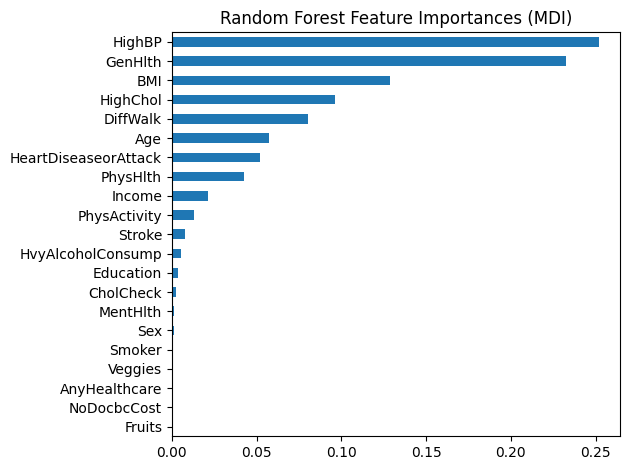

In [27]:
# model feature importance
feature_names = X.columns

model = best_models["rfc"].named_steps["rfc"]

mdi_importances = pd.Series(
    model.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

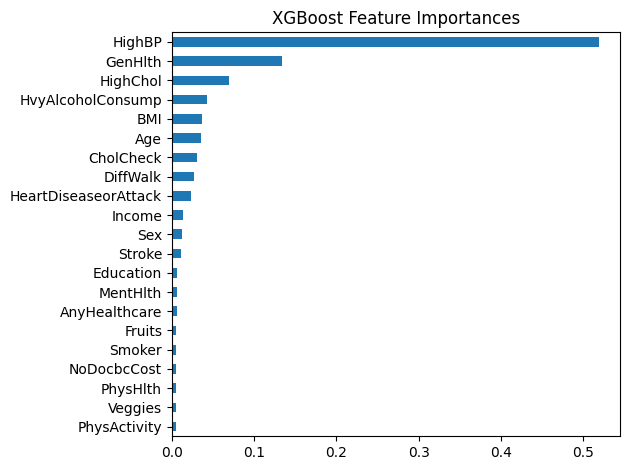

In [28]:
# model feature importance
feature_names = X.columns

model = best_models["xgbc"].named_steps["xgbc"]

mdi_importances = pd.Series(
    model.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("XGBoost Feature Importances")
ax.figure.tight_layout()

In [29]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 19.7 MB/s eta 0:00:00


In [33]:
import shap
from shap import TreeExplainer

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


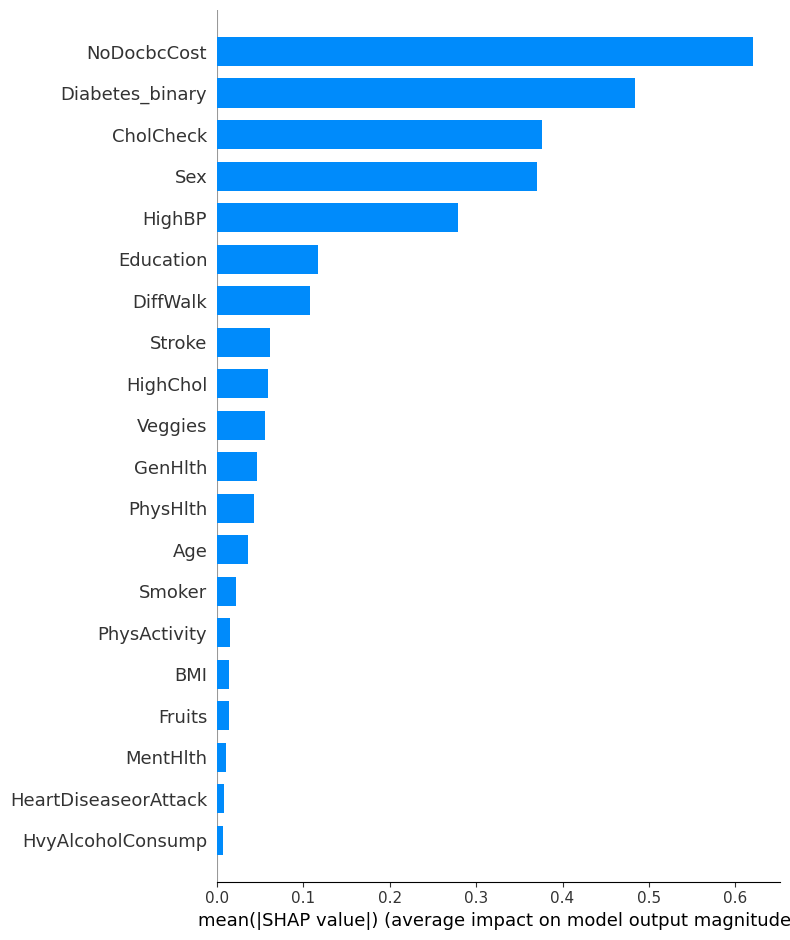

In [31]:
model = best_models[best_model].named_steps[best_model]

shap.initjs()

explainer = TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
figure = plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=data.columns, plot_type="bar")